In [0]:
#Required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **PART - 1**

---


#Creating the Dataset with content file using pandas library.


In [49]:

df=pd.read_csv('/content/drive/My Drive/QSAR_BCF_Kow.csv')
df.head()
df.tail()

,CAS,Name,SMILES,LogKOW,KOW type,logBCF
1053,V-Mey_NA_04,n.a.,FC(F)C(F)(F)Oc1ccc(cc1)C(C)(C)C(C)C(C)C,6.46,pred,3.71
1054,V-Mey_NA_05,n.a.,FC(F)C(F)(F)Oc1ccc(cc1)C(C)(C)CC(C)(C)C,6.51,pred,3.92
1055,V-Mey_NA_06,n.a.,FC(F)C(F)(F)Oc1ccc(cc1)C(c2ccc(OC(F)(F)C(F)F)c...,8.21,pred,3.76
1056,V-Mey_NA_07,n.a.,FC(F)C(F)(F)Oc1ccc(cc1)C(c2ccc(OC(F)(F)C(F)F)c...,9.14,pred,3.19
1057,V-Mey_NA_08,n.a.,FC(F)C(F)(F)Oc1ccc(cc1)C(c2ccc(OC(F)(F)C(F)F)c...,9.14,pred,2.85


#**2:**
Remove the values in column titled “LogKOW” corresponding to the values starting with V-Mey_NA in the column titled “CAS”.


---
Using string comparision operator we find the required match and stored as dataframe and accessing the index we replaced with (NaN(Not a Nūmber)).


In [50]:
df1=df[df['CAS'].str.match('V-Mey_NA')]
a=df1.index
print(a)
for i in a:
  df.at[i,'LogKOW']=np.NaN
df.tail()

Int64Index([1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057], dtype='int64')


,CAS,Name,SMILES,LogKOW,KOW type,logBCF
1053,V-Mey_NA_04,n.a.,FC(F)C(F)(F)Oc1ccc(cc1)C(C)(C)C(C)C(C)C,NaN,pred,3.71
1054,V-Mey_NA_05,n.a.,FC(F)C(F)(F)Oc1ccc(cc1)C(C)(C)CC(C)(C)C,NaN,pred,3.92
1055,V-Mey_NA_06,n.a.,FC(F)C(F)(F)Oc1ccc(cc1)C(c2ccc(OC(F)(F)C(F)F)c...,NaN,pred,3.76
1056,V-Mey_NA_07,n.a.,FC(F)C(F)(F)Oc1ccc(cc1)C(c2ccc(OC(F)(F)C(F)F)c...,NaN,pred,3.19
1057,V-Mey_NA_08,n.a.,FC(F)C(F)(F)Oc1ccc(cc1)C(c2ccc(OC(F)(F)C(F)F)c...,NaN,pred,2.85


#**3:**
 Drop columns titled Name, SMILES and KOW type.

 We dropped three columns named 'Name' , 'SMILES' , 'KOW type' along column in Dataframe using drop funtion.

In [0]:
df2=df.drop(columns=['Name','SMILES','KOW type'],axis=1)

In [52]:
df2.dtypes

CAS        object
LogKOW     object
logBCF    float64
dtype: object

Here verified the columns whether they follow linearty.
we found that LogKOW as object so, we used below command to convert in to float type.


In [53]:
df2['LogKOW'] = pd.to_numeric(df2['LogKOW'],errors='coerce')
df2.dtypes


CAS        object
LogKOW    float64
logBCF    float64
dtype: object

#**4:**
Here we added missing values with mean of that column.

In [54]:
b=df2['LogKOW'].mean()
df2=df2.fillna(value=b)
print(df2.describe())

            LogKOW       logBCF
count  1058.000000  1058.000000
mean      3.839512     2.035198
std       2.229785     1.363260
min      -4.000000    -2.480000
25%       2.390000     0.912500
50%       3.820000     2.000000
75%       5.210000     3.027500
max      18.350000     6.060000


#**5:**
we have removed unwanted column titled “CAS” to perform analysis.

In [55]:
df2.drop(columns=['CAS'])

,LogKOW,logBCF
0,2.300000,1.18
1,1.960000,1.03
2,1.980000,-0.40
3,1.020000,-1.00
4,2.990000,0.84
...,...,...
1053,3.839512,3.71
1054,3.839512,3.92
1055,3.839512,3.76
1056,3.839512,3.19


#**6:**
We performed required linear analysis like scatter ,heatmap ,pairplot etc..

,LogKOW,logBCF
LogKOW,1.000000,0.659843
logBCF,0.659843,1.000000


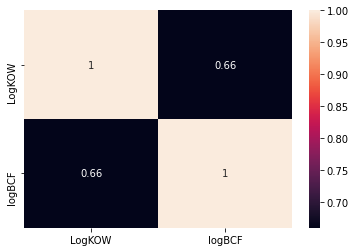

In [56]:
dfcorr=df2.corr()
sb.heatmap(dfcorr,annot=True)
dfcorr

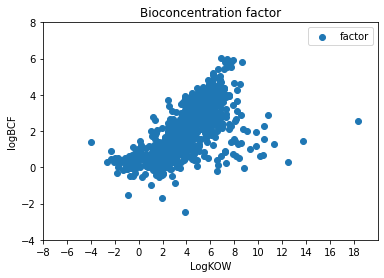

In [57]:
plt.scatter(df2['LogKOW'],df2['logBCF'],label="factor")
plt.title("Bioconcentration factor")
plt.xlim(-8,20)
plt.ylim(-4,8)
plt.xticks(np.arange(-8,20,2))
plt.legend()
plt.xlabel("LogKOW")
plt.ylabel("logBCF")
plt.show()

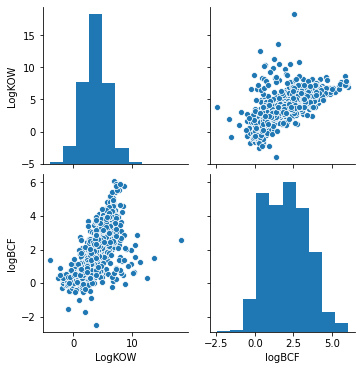

In [58]:
sb.pairplot(df2)

#**7:**
Now Normalizing the data using min-max normalizing

In [59]:
df3=((df2['LogKOW']-df2['LogKOW'].min())/(df2['LogKOW'].max()-df2['LogKOW'].min()))
print(df3)
df4=((df2['logBCF']-df2['logBCF'].min())/(df2['logBCF'].max()-df2['logBCF'].min()))
print(df4)


0       0.281879
1       0.266667
2       0.267562
3       0.224609
4       0.312752
          ...   
1053    0.350761
1054    0.350761
1055    0.350761
1056    0.350761
1057    0.350761
Name: LogKOW, Length: 1058, dtype: float64
0       0.428571
1       0.411007
2       0.243560
3       0.173302
4       0.388759
          ...   
1053    0.724824
1054    0.749415
1055    0.730679
1056    0.663934
1057    0.624122
Name: logBCF, Length: 1058, dtype: float64


#**8:**
Performed trained model
using linear regression
 

In [60]:
regress =linear_model.LinearRegression()
train_x=np.asanyarray(df2[['LogKOW']])
train_y=np.asanyarray(df2[['logBCF']])
#print(train_x)
#print(train_y)
regress.fit(train_x,train_y)
print('Coefficients:',regress.coef_)
print('Intercept:',regress.intercept_)

Coefficients: [[0.403419]]
Intercept: [0.4862653]


You can verify the values manually with approximation

![alt text](https://drive.google.com/uc?id=1rPtJ0KwR-y6_EWmzA95BFb8lH3FzfZZw)

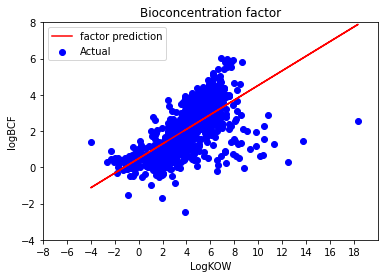

In [61]:
plt.scatter(df2.LogKOW,df2.logBCF,color="blue",label="Actual")
plt.plot(train_x,regress.coef_[0][0]*train_x+regress.intercept_[0],'-r',label="factor prediction")
plt.title("Bioconcentration factor")
plt.xlim(-8,20)
plt.ylim(-4,8)
plt.xticks(np.arange(-8,20,2))
plt.legend()
plt.xlabel("LogKOW")
plt.ylabel("logBCF")
plt.show()

In [62]:
y_predicted=regress.predict(train_x)
for i in range(0,len(train_x)):
  print(train_y[i],y_predicted[i])
df2["Predicted"]=y_predicted
print(df2)
df2.to_csv("/content/sample_data/datafile_pre.csv")

[1.18] [1.414129]
[1.03] [1.27696654]
[-0.4] [1.28503492]
[-1.] [0.89775268]
[0.84] [1.69248811]
[1.27] [1.44236833]
[0.] [0.80093212]
[1.98] [1.80141124]
[2.02] [2.45091583]
[2.46] [2.00715493]
[1.] [1.24065883]
[0.93] [2.25324052]
[1.] [1.55532565]
[1.76] [2.0192575]
[1.38] [1.82158219]
[1.46] [1.48271023]
[0.65] [0.93809458]
[0.74] [1.25679559]
[0.93] [1.30520587]
[3.24] [2.34602689]
[-0.4] [1.07525704]
[0.56] [0.63956452]
[2.24] [2.07170197]
[1.13] [1.67635135]
[1.89] [1.06718866]
[0.83] [1.15594084]
[1.55] [1.79334286]
[2.73] [2.92291606]
[2.39] [2.1402832]
[2.76] [0.97843648]
[2.33] [2.06363359]
[1.99] [1.92243694]
[2.16] [1.90226599]
[0.31] [1.6158385]
[1.4] [1.88612923]
[1.12] [1.12770151]
[2.97] [2.15641996]
[2.57] [2.18465929]
[1.05] [1.70862487]
[0.54] [1.53112051]
[0.35] [0.0828463]
[1.3] [2.2613089]
[2.3] [3.30616411]
[0.23] [0.95826553]
[1.06] [2.07170197]
[2.94] [2.04749683]
[2.48] [1.82158219]
[1.05] [1.35765034]
[1.05] [1.28503492]
[3.95] [2.95115539]
[2.57] [2.8099587

Now performing the MAE,MSE,RMSE which will analyse the accuracy of the trained model.

In [63]:
test_x=np.asanyarray(df2[['LogKOW']])
test_y=np.asanyarray(df2[['logBCF']])
print(test_y)
test_y_predicted=regress.predict(test_x)
print("Mean absolute error (MAE): %.2f",np.mean(np.absolute(test_y_predicted-test_y)))
print("Mean square error (MSE): %.2f" , np.mean((test_y_predicted - test_y) ** 2))
print("R2-score: %.2f (RMSE):",r2_score(test_y_predicted,test_y))

[[ 1.18]
 [ 1.03]
 [-0.4 ]
 ...
 [ 3.76]
 [ 3.19]
 [ 2.85]]
Mean absolute error (MAE): %.2f 0.7644445348347444
Mean square error (MSE): %.2f 1.0483174095929395
R2-score: %.2f (RMSE): -0.2967750023065543


#**PART- 2**
As we performed the 7 steps above and using the same data we are going to split dataset into train and test.

In [64]:
train_x,test_x,train_y,test_y=train_test_split(df2[['LogKOW']],df2[['logBCF']],test_size=0.30,random_state=42)
print(train_x)
print(test_x)
regress1=linear_model.LinearRegression()
regress1.fit(train_x,train_y)
print("Coefficient:",regress1.coef_)
print("Intercept: ",regress1.intercept_)


      LogKOW
310     5.41
495     4.76
104     4.60
97      3.44
377     5.13
...      ...
330     5.76
466     7.12
121    10.50
1044    2.37
860     1.56

[740 rows x 1 columns]
     LogKOW
457   -0.85
289    4.01
323    3.05
31     3.56
428    2.30
..      ...
567    4.69
956   -0.47
475    4.38
953    4.20
5      2.37

[318 rows x 1 columns]
Coefficient: [[0.40263693]]
Intercept:  [0.47428118]


* Predict the value of y, dependent value using the calculated m and c values and
store in predicted_y.
* Compare the difference between actual_y and predicted_y

In [65]:
y_predicted=regress1.predict(test_x)
y_predicted1=np.asanyarray(regress1.coef_[0][0]*train_x+regress1.intercept_[0])
print("Differnece between actual_y and y_predicted : %.2f",np.asanyarray(np.absolute(test_y-y_predicted)))


Differnece between actual_y and y_predicted : %.2f [[1.65203979]
 [1.41114474]
 [0.17232381]
 [0.08233136]
 [0.04965389]
 [2.06720212]
 [0.49271935]
 [0.46404792]
 [2.81155039]
 [0.5901204 ]
 [2.23333537]
 [0.22311233]
 [0.57130702]
 [0.28712848]
 [0.80163414]
 [0.42249364]
 [0.59227049]
 [0.41206767]
 [0.19192827]
 [0.63950172]
 [1.11992769]
 [0.27882483]
 [0.82358895]
 [0.22262805]
 [0.17016095]
 [0.7238451 ]
 [0.04148197]
 [0.84275733]
 [0.95319341]
 [0.56271935]
 [1.16461329]
 [0.92674572]
 [0.21452465]
 [0.78628931]
 [1.33547535]
 [1.18461329]
 [0.57665441]
 [1.01276744]
 [0.39208044]
 [0.03361939]
 [0.47415955]
 [0.77233136]
 [1.25453476]
 [0.36839885]
 [0.93978933]
 [0.65347999]
 [0.10780049]
 [0.19600273]
 [0.11955247]
 [0.34036644]
 [0.81563763]
 [0.27816559]
 [0.26520154]
 [1.04595464]
 [0.08503171]
 [0.92189784]
 [0.4836295 ]
 [0.12553621]
 [0.39427107]
 [0.91581012]
 [0.10212853]
 [0.86947128]
 [0.62124615]
 [0.75530296]
 [0.21316565]
 [0.14590132]
 [1.21243277]
 [0.6107619

In [66]:
print("Mean absolute error (MAE): %.2f",np.mean(np.absolute(y_predicted-test_y)))
print("Mean square error (MSE): %.2f" , np.mean((y_predicted - test_y) ** 2))
print("R2-score: %.2f (RMSE):",r2_score(y_predicted,test_y))

Mean absolute error (MAE): %.2f logBCF    0.765566
dtype: float64
Mean square error (MSE): %.2f logBCF    1.039597
dtype: float64
R2-score: %.2f (RMSE): -0.3198853251943181


#**PART - 3**

* Performing cross – validation with 2, 3, 4 and till 14 folds with r2 as the metric.

In [67]:
for i in range(2,15):
  accuracy= cross_val_score(regress,df2[['LogKOW']],df2[['logBCF']],cv=i,scoring='r2')
  print("Accuracy %d :"%(i))
  print(accuracy,"\n")
  print("Mean of Accuracy with %d folds:"% (i))
  print(np.mean(accuracy),"\n")


Accuracy 2 :
[0.29513049 0.48683451] 

Mean of Accuracy with 2 folds:
0.39098250156474834 

Accuracy 3 :
[0.32242264 0.36151676 0.47518466] 

Mean of Accuracy with 3 folds:
0.3863746874990808 

Accuracy 4 :
[0.11854155 0.34889048 0.48910151 0.44845834] 

Mean of Accuracy with 4 folds:
0.35124796799150704 

Accuracy 5 :
[0.16745185 0.40374529 0.31384408 0.54704882 0.44052574] 

Mean of Accuracy with 5 folds:
0.37452315679134607 

Accuracy 6 :
[0.11875302 0.42180727 0.25871929 0.46031066 0.49895011 0.44625153] 

Mean of Accuracy with 6 folds:
0.367465312873873 

Accuracy 7 :
[0.23618717 0.28084281 0.23791314 0.32517911 0.55581601 0.5067558
 0.41305038] 

Mean of Accuracy with 7 folds:
0.3651063452167899 

Accuracy 8 :
[0.24340813 0.09675065 0.5299988  0.20536557 0.41671152 0.5936958
 0.45341588 0.42718901] 

Mean of Accuracy with 8 folds:
0.3708169221341103 

Accuracy 9 :
[0.22990254 0.02093163 0.53239562 0.2020021  0.19466584 0.57332198
 0.52826603 0.45898584 0.3956452 ] 

Mean of Accur

* Performing thorough analysis on train vs predicted.
* Performing thorough analysis on test vs predicted.

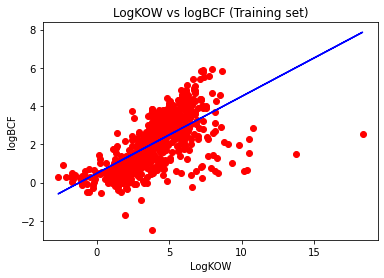

In [68]:
plt.scatter(train_x,train_y,color='red')
plt.plot(train_x,regress1.predict(train_x),color='blue')
plt.title("LogKOW vs logBCF (Training set)")
plt.xlabel('LogKOW')
plt.ylabel('logBCF')
plt.show()

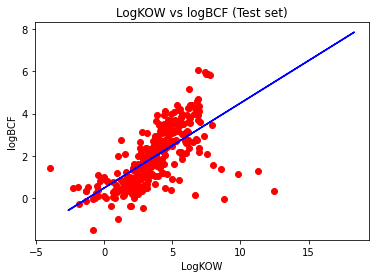

In [69]:
plt.scatter(test_x,test_y,color='red')
plt.plot(train_x,regress1.predict(train_x),color='blue')
plt.title("LogKOW vs logBCF (Test set)")
plt.xlabel('LogKOW')
plt.ylabel('logBCF')
plt.show()